<a href="https://colab.research.google.com/github/pvanand07/EDA-Hotel-Booking-Python/blob/master/EDA_Hotel_Booking_Analysis_Almabetter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -    **Hotel Booking Analysis** 



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Submitted By**    - Anand Siva P V  


# **Project Summary -**

This project aims to conduct an exploratory data analysis (EDA) on a dataset of hotel bookings to gain insights on booking patterns and customer behaviour. The analysis will focus on dentifying patterns in bookings and cancellations, customer demographics and preferences, and the effectiveness of different distribution channels.\
The dataset used for this project is available [here](https://drive.google.com/file/d/1C9AxF9fcVzMw0Bgs0NaRrNML2WwX1Ehm/view).\
 [Built using jupyter notebook and Python 3]

# **GitHub Link -**

https://github.com/pvanand07/EDA-Hotel-Booking-Python/blob/master/EDA_Hotel_Booking_Analysis_Almabetter.ipynb

# **Additional Links -**
- Presentation - Pdf -GDrive
- Presentation Video - GDrive - (Mirror)Youtube
- Github Repository
- Linkedin

# **Problem Statement**


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.

#### **Define Your Business Objective?**

 The business objectives that this project tries to achieve are 
- To gain a comprehensive understanding of booking patterns and customer behavior 
- Understand which amenities and services are most popular among guests
- Determine key drivers of occupancy, revenue, and customer satisfaction
- Form strategies for increasing occupancy, revenue and customer satisfaction.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [39]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

### Dataset Loading

In [40]:
# Try to load dataset if it is on local directory
try:
    dataset = pd.read_csv("Hotel Bookings.csv")
# Else mount and load from google drive - Only for google colab
except:
    from google.colab import drive
    drive.mount('/content/drive')
    dataset = pd.read_csv('/content/drive/MyDrive/Almabetter Projects/Hotel Booking/Hotel Bookings.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [41]:
# Dataset First Look- Top 4 rows
dataset.head(4).T

,0,1,2,3
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0
lead_time,342,737,7,13
arrival_date_year,2015,2015,2015,2015
arrival_date_month,July,July,July,July
arrival_date_week_number,27,27,27,27
arrival_date_day_of_month,1,1,1,1
stays_in_weekend_nights,0,0,0,0
stays_in_week_nights,0,0,1,1
adults,2,2,1,1


In [42]:
# Dataset First Look- Bottom 4 rows
dataset.tail(4).T

,119386,119387,119388,119389
hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0
lead_time,102,34,109,205
arrival_date_year,2017,2017,2017,2017
arrival_date_month,August,August,August,August
arrival_date_week_number,35,35,35,35
arrival_date_day_of_month,31,31,31,29
stays_in_weekend_nights,2,2,2,2
stays_in_week_nights,5,5,5,7
adults,3,2,2,2


### Dataset Rows & Columns count

In [43]:
# Dataset Rows & Columns count
print('Dataset Rows :{} \nDataset Columns :{}'.format(dataset.shape[0],dataset.shape[1]))

Dataset Rows :119390 
Dataset Columns :32


### Dataset Information

In [44]:
# Check dataset information using dataset.info() 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [45]:
# Percentage of duplicate values in dataset
len(dataset[dataset.duplicated()])*100/dataset.shape[0]

26.797889270458164

In [46]:
# Dropping Duplicate Values
df = dataset.drop_duplicates().reset_index(drop = True)
print('Shape of dataset after dropping duplicate values:',df.shape)

Shape of dataset after dropping duplicate values: (87396, 32)


#### Missing Values/Null Values

In [47]:
# Count of missing values/null values
nan_count = df.isna().sum().sort_values(ascending = False)

# Print only columns with non-zero number of missing values
nan_count = nan_count[nan_count>0]
print(nan_count)

company     82137
agent       12193
country       452
children        4
dtype: int64


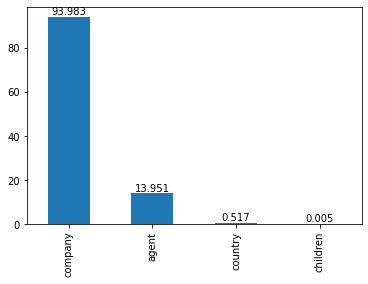

In [48]:
# Finding percentage of missing values
df_nan_perc = (nan_count*100/len(df)).round(3)

# Visualizing the missing values
df_nan_perc.plot.bar()

# Adding text on top of bars
for idx,y in enumerate(df_nan_perc):
    plt.text(idx,y+1,y, ha ='center')

- Most data is missing (`94%`.) from the `'company'` column and also some data is missing from three other columns as well.
- We can drop the `'company'` and `'agent'`column.
- We can drop the missing rows from columns `'country'` and `'children'`.

In [49]:
#Droping missing values
df_1 =   df.drop(['company','agent'],axis = 1).dropna().reset_index(drop = True)

### What did you know about your dataset?

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

## ***2. Understanding Your Variables***

In [50]:
# Dataset Columns
df_1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [51]:
# Dataset Describe
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,86940.0,0.275903,0.446971,0.00,0.00,0.0,1.0,1.0
lead_time,86940.0,80.193375,86.100147,0.00,12.00,50.0,125.0,737.0
arrival_date_year,86940.0,2016.211824,0.686016,2015.00,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,86940.0,26.841477,13.654505,1.00,16.00,27.0,37.0,53.0
arrival_date_day_of_month,86940.0,15.818024,8.834469,1.00,8.00,16.0,23.0,31.0
stays_in_weekend_nights,86940.0,1.007396,1.028763,0.00,0.00,1.0,2.0,16.0
stays_in_week_nights,86940.0,2.628744,2.043753,0.00,1.00,2.0,4.0,41.0
adults,86940.0,1.878525,0.625860,0.00,2.00,2.0,2.0,55.0
children,86940.0,0.139211,0.456786,0.00,0.00,0.0,0.0,10.0
babies,86940.0,0.010835,0.113592,0.00,0.00,0.0,0.0,10.0


- Cancellation rate: The is_canceled feature has a mean of 0.27, which suggests that approximately 27% of bookings are cancelled. This could be an important metric, as it could indicate issues with overbooking or customer dissatisfaction.

- Lead time: The mean lead time of 80 days suggests that on average, customers book their stay about 80 days in advance. This could be useful for the hotel to know when planning for staffing and room inventory.

- Room occupancy: The mean number of adults per booking is 1.87, children is 0.14, and babies is 0.01. This could indicate the typical composition of guests staying in the hotel, and could inform decisions such as room size and amenities offered.

- Repeat guests: The is_repeated_guest feature has a mean of 0.04, which suggests that only 4% of guests are repeat customers. This could indicate a need for the hotel to focus on customer retention or improving the guest experience.

- Special requests: The total_of_special_requests feature has a mean of 0.7, which suggests that on average, guests make about 0.7 special requests per booking. This could be useful for the hotel to know when planning for staffing and resources.

- Booking Changes: The booking_changes feature has a mean of 0.27, this could indicate that guests are frequently changing their bookings, which could indicate issues with customer service or flexibility with the booking process.

- Average Daily Rate: The mean of ADR is 106.57,this would be useful for the hotel to know when planning for pricing strategy.

Additionally we can see that the max adr is 5400, max days in waiting list is 391 days, max lead time is 737 days which could be outliers, which can be addressed during data visualization.  

### Variables Description 

| Field | Description |
| --- | --- |
| hotel | H1= Resort Hotel H2=City Hotel |
| is_cancelled | If the booking was cancelled(1) or not(0) |
| lead_time | "Number of days that elapsed between the entering date of the booking into the PMS and the arrival date" |
| arrival_date_year | Year of arrival date |
| arrival_date_month | Month of arrival date |
| arrival_date_week_number | Week number for arrival date |
| arrival_dat_day | Day of arrival date |
| stays_in_weekend_nights | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
| stays_in_week_nights | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
| adults | Number of adults | 
| children | Number of children |
| babies | Number of babies |
| meal | Kind of meal opted |
| country | Country code | 
| market_segment | Which segment the customer belongs to |
|  Distribution _channel | How the customer accessed the stay-corporate booking/Direct/TA.TO |  
|  is_repeated_guest | Guest coming for first time or not |  
|  previous_cancellation | Was there a cancellation before |  
|  previous_bookings | Count of previous bookings |  
|  reserved_room_type | Type of room reserved |  
|  assigned_room_type | Type of room assigned |  
|  booking_changes | Count of changes made to booking |  
|  deposit_type | Deposit type |  	
|  agent | Booked through agent |  
|  days_in_waiting_list | Number of days in waiting list |  
|  customer_type | Type of customer |  
|  required_car_parking | If car parking is required |  
|  total_of_special_req | Number of additional special requirements |  
|  reservation_status | Reservation of status |  
|  reservation_status_date | Date of the specific status |  

### Check Unique Values for each variable.

In [52]:
# Check Unique Values for each variable.
df_1_unique = df_1.nunique().sort_values()
# Print only unique values that are less than 13
unique_8 = df_1_unique[df_1_unique < 13].index
for column in unique_8:
  print('Unique values in {:28}:'.format(column),df_1[column].unique())

Unique values in hotel                       : ['Resort Hotel' 'City Hotel']
Unique values in is_canceled                 : [0 1]
Unique values in is_repeated_guest           : [0 1]
Unique values in arrival_date_year           : [2015 2016 2017]
Unique values in deposit_type                : ['No Deposit' 'Refundable' 'Non Refund']
Unique values in reservation_status          : ['Check-Out' 'Canceled' 'No-Show']
Unique values in customer_type               : ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in required_car_parking_spaces : [0 1 2 8 3]
Unique values in distribution_channel        : ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in children                    : [ 0.  1.  2. 10.  3.]
Unique values in babies                      : [ 0  1  2 10  9]
Unique values in meal                        : ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in total_of_special_requests   : [0 1 3 2 4 5]
Unique values in market_segment              : ['Direct

## **3. *Data Wrangling***

### Data Wrangling Code

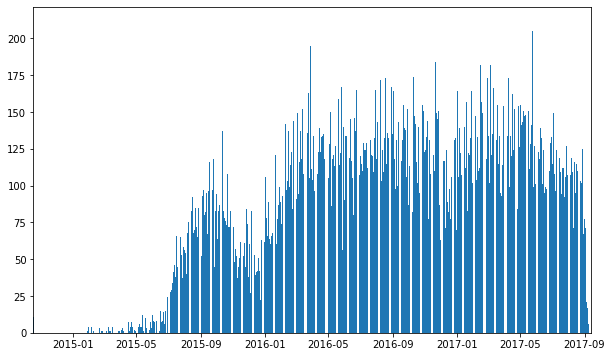

In [53]:
# Write your code to make your dataset analysis ready.
# To check the distribution of data points we can use a countplot

# Converting the date column in 'df_1' to a datetime data type using pd.to_datetime() function.
df_1['reservation_status_date'] = pd.to_datetime(df_1['reservation_status_date'])

# Count the number of values by date
counts = df_1['reservation_status_date'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Limit the x axis for better visualization
plt.xlim(pd.Timestamp('2014-10-17'), pd.Timestamp('2017-09-14'))

# Plot the bar plot
plt.bar(counts.index, counts.values)
plt.show()

- From the plot we can see that very little data points exists before '2015-05-01'. Including these data could skew our results. 
- Hence we are only including the data from `'2015-05-01'` to `'2017-09-14'` (Last date of booking in the dataset)

In [54]:
# Trimming the rows of dataset where reservation date is older than 2015-05-01 
df_2=df_1[(df_1['reservation_status_date']>pd.Timestamp('2015-05-01'))&((df_1['reservation_status_date']<pd.Timestamp('2017-09-14')))].reset_index(drop = True)

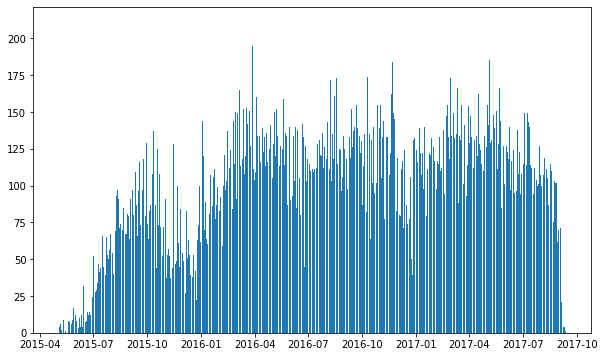

In [55]:
# Visualizing the new selection of data points
# Get the counts
counts = df_2['reservation_status_date'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar plot
plt.bar(counts.index, counts.values)
plt.show()

### What all manipulations have you done and insights you found?

In [56]:
print('Shape of the dataset before cleaning :',dataset.shape)
print('Shape of the dataset after cleaning :',df_2.shape)

Shape of the dataset before cleaning : (119390, 32)
Shape of the dataset after cleaning : (86691, 30)


- `26.79%` of values in dataset are duplicated, hence these are dropped 
- Data points seems to be missing before `2015-05-01`. Hence the  data before the same is excluded from analysis.
- `'company'`,`'agent'`,`'country'`,`'Children'` columns are missing `93.983%`, `3.951%`, `0.517%`, `0.005%` of data repectively
- `'company'` and `'agent'`columns are dropped
- Missing rows from columns `'country'` and `'children'` are also dropped
 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Univariate Analysis**

1. To understand the distribution of data in various categorical variables lets plot a percentage bar plot

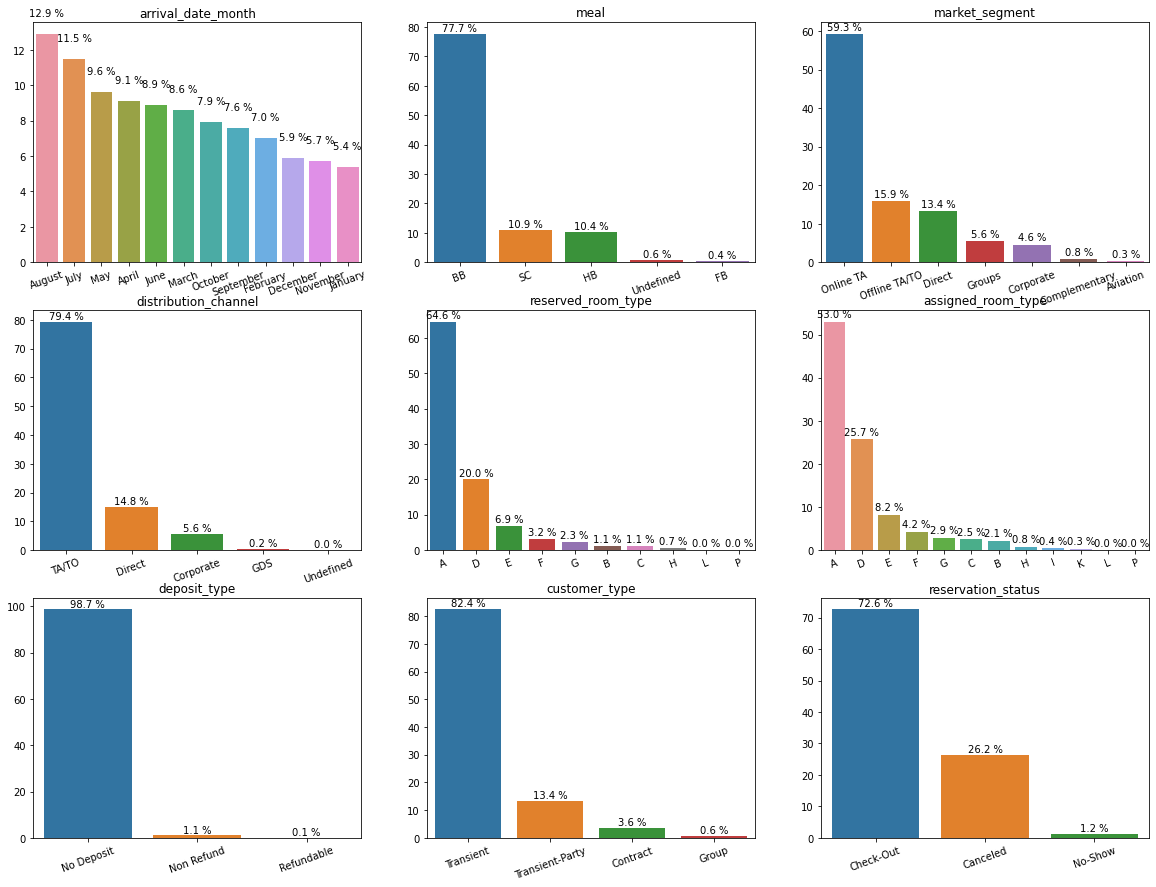

In [57]:
#let's try to plot all the non numerical categorical columns. First let's remove columns 
#having too many categories, also the 'hotel' column to analyze later.  
cat_columns = df_2.select_dtypes(exclude=['int', 'float']).columns
cat_columns =list(cat_columns)
cat_columns.remove('reservation_status_date')
cat_columns.remove('country')
cat_columns.remove('hotel')

# set a larger figure size for subplots
plt.figure(figsize = [20  , 15]) 
for i,x in enumerate(cat_columns):

  # 3 row, 3 cols, subplot i+1 since subplot starts from 1
  plt.subplot(3, 3,i+1)

  # Get the value counts of the x column
  counts = (df_2[x].value_counts()*100/len(df_2)).round(1)
  
  # Create a barplot using the value counts
  sns.barplot(x=counts.index, y=counts.values, order = counts.index )
  plt.title(str(x)) 
  plt.xticks(rotation = 20)
  # Adding percentage values on top of bars
  for idx,y in enumerate(counts.values):
    plt.text(idx,y+1,'{} %'.format(y), ha ='center')
    
plt.show()


- Here bar charts are used  due to effectiveness in comparing and visualizing large categories of data
- `August` and `July` are the months with the highest number of bookings (`12.9%` and `11.5%`, respectively) 
- While `january` and `November` has the least number of bookings (`5.3%` and `5.7%`, respectively)
- The meal type `BB   (Breakfast in Bed)` is most prefered, (`77%`) of total orders
- `Online TA/TO` (Travel agent/Tour Operator) is the most prefered medium of bookings(`59%`)
- `Room type A` is the most reserved and assigned room type (`64.6%` and `53.0%`, respectively).
 Later we can check if the demand has a correlation with the price the room. 
- `No deposit bookings` account for the majority of bookings(`98.8%`)
- `Customer type transient` makes the majority of bookings(`82.4%`)

- The data suggest that Bookings during `August` and `July`, `BB meal type`, `No deposit` Booking type, Booking through `Online TA`, `Room type A`, `Transient` are the popular options among guests.
Increasing the availability of these options could lead to an increased revenue

## **Univariate Analysis Questions**

#### Chart - 1. What is the trend of *bookings* over **month**, **week** and **day**?

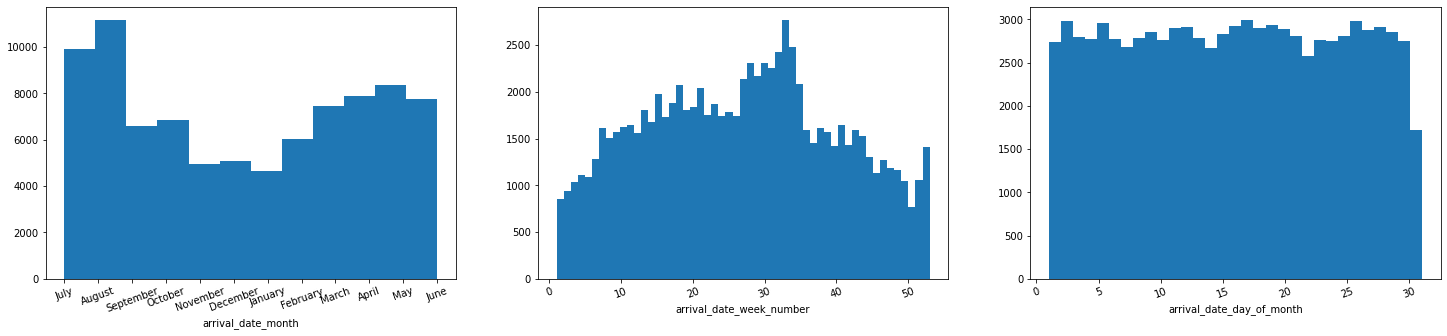

In [58]:
cat_columns_ordinal =['arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month']

# Create a figure with 3 subplots
plt.figure(figsize = [25, 5]) 

# 1 row, 3 cols, subplot 1
plt.subplot(1, 3, 1)
x=cat_columns_ordinal[0]

# Create a histogram of the values in the column
plt.hist(df_2[x], bins = 12)
plt.xlabel(str(x))
plt.xticks(rotation = 20)

# Subplot 2
plt.subplot(1, 3, 2)
# Assign the second column in the list to x
x=cat_columns_ordinal[1]

# Create a histogram of the values in the column
plt.hist(df_2[x], bins = 53)
plt.xlabel(str(x))
plt.xticks(rotation = 20)

# Subplot 3
plt.subplot(1, 3, 3)
x=cat_columns_ordinal[2]

# Create a histogram of the values in the column
plt.hist(df_2[x], bins = 31)
plt.xlabel(str(x))
plt.xticks(rotation = 20)

# Show the figure
plt.show()


##### 1. Why did you pick the specific chart?

Histograms helps us to see the distribution of data over categories or a period of time.

##### 2. What is/are the insight(s) found from the chart?

- Based on the data, it appears that bookings vary by season, with the highest number of bookings take place during the months of May, June, July, and August. 
- The months of November, December, January, and February tend to have the lowest levels of bookings."

##### 3. Will the gained insights help creating a positive business impact? 

- Identifying the periods of higher demand can help the management to prepare beforehand and allocate more resources
- Additionally strategies can be developed to address lower demand periods.

#### Chart - 2. What are the guest demographics?

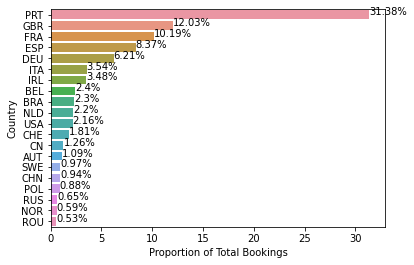

In [59]:
# Get the top 20 countries based on the number of bookings and the proportion of total bookings
df_top = (df_2['country'].value_counts()[:20]*100/len(df_2)).round(2)

# Create a bar plot with the top countries on the y-axis and the proportion of bookings on the x-axis
sns.barplot(x=df_top.values, y=df_top.index)

# Add x-axis label
plt.xlabel('Proportion of Total Bookings')
# Add y-axis label
plt.ylabel('Country')

# Loop through the bars and add the percentage value above each bar
for idx,y in enumerate(df_top.values):
    plt.text(y,idx,str(y)+'%', ha ='left')     
# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

- Here horizontal bar chart helps us to visualize and compare multiple categories 

##### 2. What is/are the insight(s) found from the chart?

- Guests from `Portugal` has made most bookings (`31%`) followed by `United Kingdom` (`12%`) and `France` (`10%`). 

##### 3. Will the gained insights help creating a positive business impact? 

- Identifying the demographics of guests helps to better prepare staffs and run ad-campaigns 

#### Chart - 3. What is the **percentage of cancellations?**


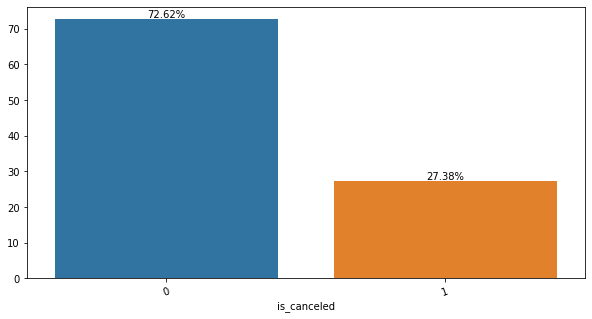

In [60]:
# Chart - 2 visualization code
#identify percentage of cancellations

# Get percentage of value counts for 'arrival_date_month' column
counts = (df_2['is_canceled'].value_counts()*100/len(df_2)).round(2)

# Set figure size
plt.figure(figsize = [10  , 5])   

# Create a barplot using the value counts
sns.barplot(x=counts.index, y=counts.values, order = counts.index )

#Rotate x-tick labels for easier reading, add x-label
plt.xticks(rotation = 20)
plt.xlabel('is_canceled')

#Add value count labels on top of each bar
for idx,y in enumerate(counts.values):
  
  #plt.text(x_co-ord, y_co-ord, value, ha(horrizontal alignment))
  plt.text(idx,y+0.5,str(y)+'%', ha ='center') 
plt.show()







##### 1. Why did you pick the specific chart?

A bar chart makes it easier compare the different categories. Here it helps to visualize and compare the proportion of bookings that were cancelled

##### 2. What is/are the insight(s) found from the chart?

- From the chart we an see that a good portion (`27%`) of the bookings were cancelled which leads to loss of revenue

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- The cancellations can lead to negative growth due to a decrease in revenue. Further analysis can be conducted to identify the reason/sources of high cancellations

## **Bivariate Analysis**

#### Chart - 4. Which Hotel generates highest revenue?


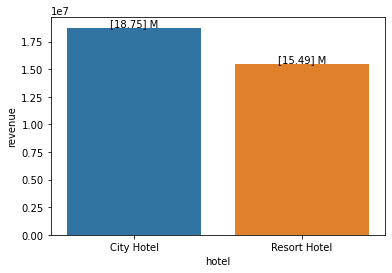

In [61]:
# Chart - 2 visualization code
# Get total stay duration from stays in week and weekends
df_2['Total_stay_duration'] = df_2['stays_in_weekend_nights'] + df_2['stays_in_week_nights']

# Get revenue by multiplyig total stay duarion with adr
df_2['revenue'] = df_2['Total_stay_duration']*df_2['adr']

# Group and sum the revenue column by hotel column
# Grouping returns a multi-index pandas series. Use pd.DataFrame to convert to a dataframe
group_1 = pd.DataFrame(df_2[['hotel','revenue']].groupby(['hotel']).sum())

# Plot the data using sns.barplot()
sns.barplot(data = group_1, x=group_1.index,y='revenue')

# Add value count labels on top of each bar
for idx,y in enumerate(group_1.values):
  
  #plt.text(x_co-ord, y_co-ord, value, ha(horrizontal alignment))
  plt.text(idx,y+(10**5),str((y/10**6).round(2))+' M', ha ='center') 
plt.show()

##### 1. Why did you pick the specific chart?

Here the Bar chart helps us to easily visualize and compare the difference in revenue of the two hotels.

##### 2. What is/are the insight(s) found from the chart?

- City Hotel and Resort hotel has generated a revenue of `18.75 M Pounds` and `15.49 M pounds` respectively during the period `2015-05-01` - `2017-09-01`.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 - Revenue is a key metric which is used to identify the performance of a hotel. This can help us in the further evaluations.

#### Chart - 5. How does average of ADR varies by Week,Room type and Market Segment? 


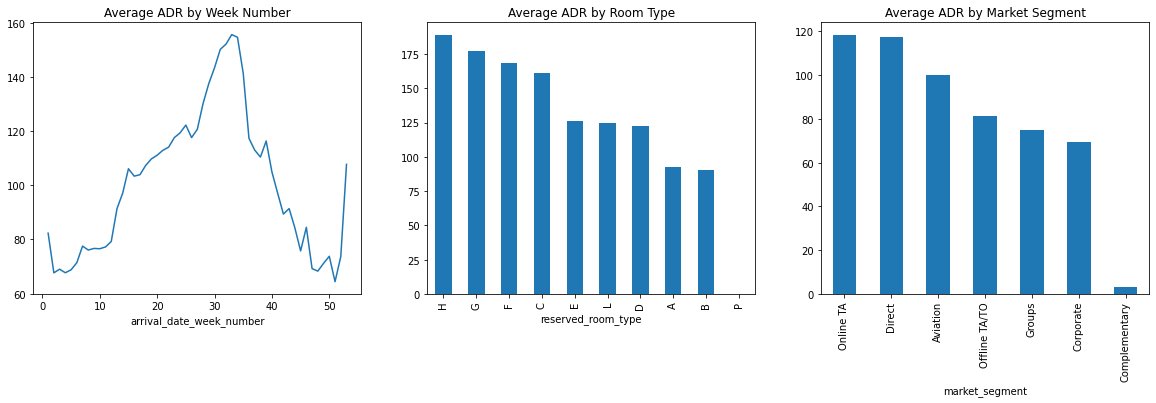

In [78]:
# set figure size 
plt.figure(figsize = [20, 5])

# create first subplot
plt.subplot(1,3,1)

# group data by 'arrival_date_week_number' and calculate average 'adr'
df_2.groupby('arrival_date_week_number')['adr'].mean().plot()
plt.title("Average ADR by Week Number")

# create second subplot
plt.subplot(1,3,2)

# group data by 'reserved_room_type' and calculate average 'adr' while sorting values in descending order
df_2.groupby('reserved_room_type')['adr'].mean().sort_values(ascending =False).plot(kind='bar')
plt.title("Average ADR by Room Type")

# create third subplot
plt.subplot(1,3,3)

# group data by 'market_segment' and calculate average 'adr' while sorting values in descending order
df_2.groupby('market_segment')['adr'].mean().sort_values(ascending =False).plot(kind='bar')
plt.title("Average ADR by Market Segment")

# display the plot
plt.show()

##### 1. Why did you pick the specific chart?

- Here the line chart helps to see the trend of ADR over time, while the bar chart helps to compare different categories.

##### 2. What is/are the insight(s) found from the chart?

- The peak in average `ADR` occurs during the `weeks 30-35` which can be correlated to high booking demand.
- This might be due to the hotels adjusting the room rates for the higher demand and increased sales of other amenities. 
- The rooms which generates the highest `ADR` are `H` followed `G`, and `F`
- The market segment which generates highest `ADR` are `Online Travel Agent` followed by `Direct Booking` and `Aviation`


##### 3. Will the gained insights help creating a positive business impact? 

- Since `online TA` generates high ADR the management can direct its marketing towards online mediums to increase its visibility on these platforms and potentially capture more bookings.

#### Chart 6. How does adr varies with room type?

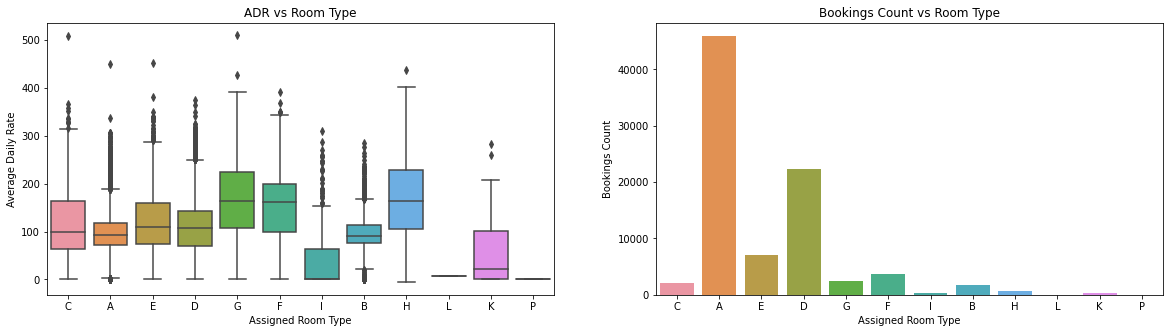

In [63]:
# Filtering outlier in ADR
df_2 = df_2[df_2['adr']<1000]

# Set figure size
plt.figure(figsize=(20,5))

# First subplot
plt.subplot(1,2,1)

# Add boxplot for ADR over assigned room type
sns.boxplot(x='assigned_room_type', y='adr', data=df_2)
plt.xlabel('Assigned Room Type')
plt.ylabel('Average Daily Rate')
plt.title('ADR vs Room Type')

# Second subplot
plt.subplot(1,2,2)

# Add countplot for bookings over room type
sns.countplot(data=df_2, x='assigned_room_type')
plt.xlabel('Assigned Room Type')
plt.ylabel('Bookings Count')
plt.title('Bookings Count vs Room Type')

plt.show()


##### 1. Why did you pick the specific chart?

- Here the box plot helps to visualize the distribution of ADR over different room types

##### 2. What is/are the insight(s) found from the chart?

- Most booked rooms are `A`, `D`, `E` with an average ADR of `95`, `109` and `119` respectively
- Most expensive rooms are `F`,`G` and `H` with average ADR of `153`, `167`, and `172` respectively
- Average daily rate is negatively correlated to number of bookings

##### 3. Will the gained insights help creating a positive business impact? 

- Management can use these insights to optimize ADR and to maximize revenue

#### Chart - 7. Which hotel has highest cancellations?

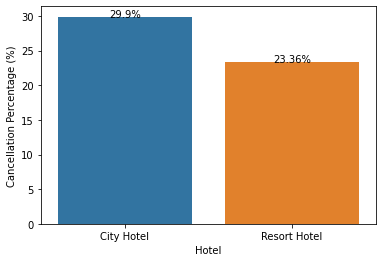

In [79]:
# Get percentage of cancellations for each hotel
counts = (df_2.groupby('hotel')['is_canceled'].sum()* 100 / counts_total).round(2)

# Create a barplot of cancellation percentages for each hotel
sns.barplot(x=counts.index, y=counts.values)

# Add x and y labels
plt.xlabel('Hotel')
plt.ylabel('Cancellation Percentage (%)')

# Add value count labels on top of each bar
for i, v in enumerate(counts.values):
    plt.text(i, v, f'{v}%', ha='center')

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

Here barchart helps us compare and visualize differences in percentage of cancellations in each hotel

##### 2. What is/are the insight(s) found from the chart?

We can observe that that City Hotels have a higher percentage of cancellations compared to Resort Hotels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Cancellations can lead to a loss of revenue. We can try to identify the reasons for this in our further analysis.

#### Chart - 8. How does cancellation rate varies by Room Type? 

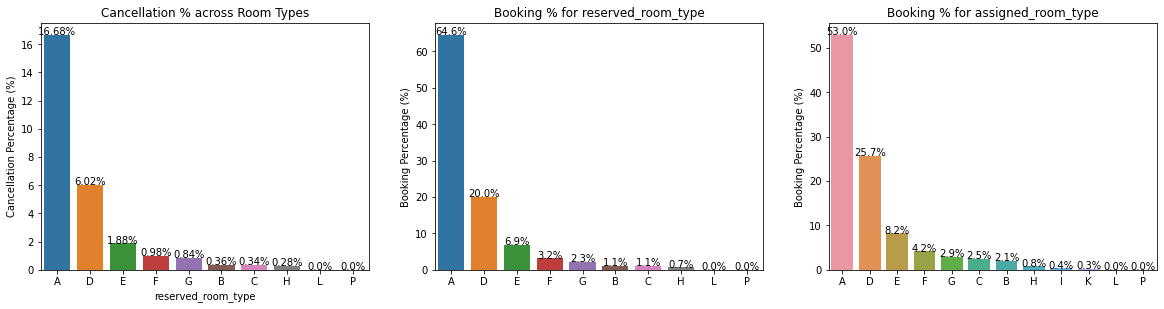

In [66]:
# Set figure size
plt.figure(figsize=[20,10])

# Subplot for Cancelled Room Types
plt.subplot(2, 3, 1)

# Get percentage of cancelled rooms grouped by room type
cancelled_rooms = (df_2.groupby('reserved_room_type')['is_canceled'].sum() * 100 / len(df_2)).round(2).sort_values(ascending=False)

# PLot barplot for cancelled_rooms
sns.barplot(x=cancelled_rooms.index, y=cancelled_rooms.values)
plt.title('Cancellation % across Room Types')
plt.ylabel('Cancellation Percentage (%)')

# Add perentage values on top of bars
for i, v in enumerate(cancelled_rooms.values):
    plt.text(i, v, f'{v}%', ha='center')

# Subplots for Room Type Distribution
# Use for loop to plot booking percentage for two room types
room_types = ['reserved_room_type', 'assigned_room_type']
for i, col in enumerate(room_types):
    plt.subplot(2, 3, i+2)
    counts = (df_2[col].value_counts() * 100 / len(df_2)).round(1)
    sns.barplot(x=counts.index, y=counts.values)
    plt.title('Booking % for '+str(col))
    plt.ylabel('Booking Percentage (%)')

    # Show % value on top of bars
    for j, val in enumerate(counts.values):
        plt.text(j, val, f'{val}%', ha='center')
        

##### 1. Why did you pick the specific chart?

- Bar chart helps us to visualize and compare the cancellation rates across room types

##### 2. What is/are the insight(s) found from the chart?

- Cancellations are higher for room `A` followed by `D` and `E`
- From the booking percentages can see the shift of provided rooms from `A` to `D` and `E`. 
- Hence we can conclude that room type `A` is getting cancelled due to the lack of availability.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Increasing the availabilty of most popular room (A) could decrease cancellations and increase revenue

#### Chart - 9. How does cancellation rate varies by market segment? 


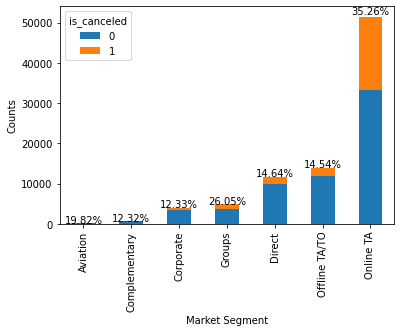

In [80]:
# Creating a crosstab of market_segment and is_canceled columns and sorting by count of non cancelled bookings
df_2_crosstab = pd.crosstab(df_2['market_segment'], df_2['is_canceled']).sort_values(by = 0)

# Plotting the crosstab in a stacked bar chart
df_2_crosstab.plot(kind='bar',stacked=True)

# Adding the percentage values of cancellations on top of each bar
ax = plt.gca()
for i,x in enumerate(df_2_crosstab.values):
    plt.text(i, (x[0]+x[1])*1.01, '{:.2%}'.format(x[1]/(x[0]+x[1])), ha='center')
    
ax.set_ylabel("Counts")
ax.set_xlabel("Market Segment")
ax.legend(title='is_canceled')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

- `Online TA` has the highest percentage of cancellation at `35.4%` 
- `Offline TA/TO` and `groups` have relatively lesser cancellations at `14.54%` and `14.64%` respectively

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Identifying areas of higher cancellations could help the hotel to make the necessary changes to address these issues.

#### Chart - 10. How does ADR and number of bookings varies over time?


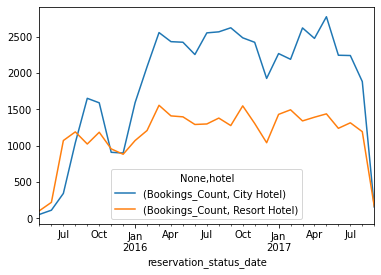

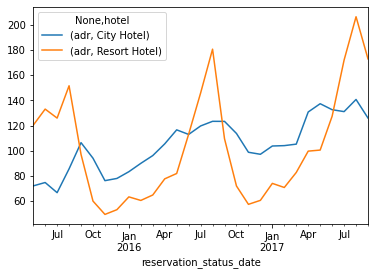

In [68]:
# Calculating the count of bookings by month using pd.Grouper
# Since count is taken on 'adr' column, rename column 'adr' to 'Booking count'
bookings_by_month = df_2[['reservation_status_date','adr','hotel']].rename(columns={'adr':'Bookings_Count'})
bookings_by_month = bookings_by_month.groupby([pd.Grouper(key='reservation_status_date', freq='M'),'hotel']).count()

# plot the output
bookings_by_month.unstack().plot()

# Calculating the average of adr generated by month using pd.Grouper
adr_by_month = df_2[['reservation_status_date','adr','hotel']].groupby([pd.Grouper(key='reservation_status_date', freq='M'),'hotel']).mean()
adr_by_month.unstack().plot()


##### 2. What is/are the insight(s) found from the chart?

- From these tables, we can see that there are more bookings and higher ADR for City Hotels compared to Resort Hotels. Additionally, it appears that bookings and ADR for both City and Resort Hotels peak in the months of July and August.

- It also appears that the ADR for City Hotels is consistently higher than that of Resort Hotels. This could indicate that City Hotels are able to charge higher rates for their rooms.

- We can also observe that there is a increasing trend in the ADR for both city and resort hotels throughout the years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Overall, these insights can help management to make strategic decisions such as adjusting room prices and allocating enough resources to optimize revenue during high-demand periods.

#### Chart - 11. Is there any relationship between Lead Time and Cancellation Rate?


38.0
79.0


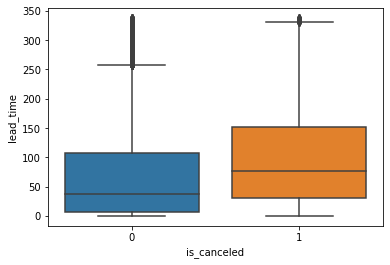

In [69]:
# Chart - 10 visualization code

# Calculating z-score for column 'lead_time'
z = np.abs(zscore(df_2['lead_time']))

# Filtering values having a z-score less than 3
df_2z = df_2[(z < 3)]

# Plotting boxplot using sns.boxplot()
sns.boxplot(data = df_2z , x='is_canceled',y='lead_time')

# Calculating mean of lead time for both categories
mean_0 = df_2[df_2['is_canceled']==0]['lead_time'].quantile(0.5)
mean_1 = df_2[df_2['is_canceled']==1]['lead_time'].quantile(0.5)
print(mean_0)
print(mean_1)

##### 1. Why did you pick the specific chart?

Here boxplot is used to visualize the distribution of a numerical variable over a categorical variable

##### 2. What is/are the insight(s) found from the chart?

- The Average of lead time is `38 days` for not cancelled and `79 days` for cancelled bookings
- High lead time can increase the probability of cancellations

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- The hotel can provide regular updates to the customers having higher lead time to reduce cancellations 

#### Chart - 12. Is there any relationship between Deposit type and Cancellation Rate?


Text(0.5, 1.0, 'Revenue by deposit type')

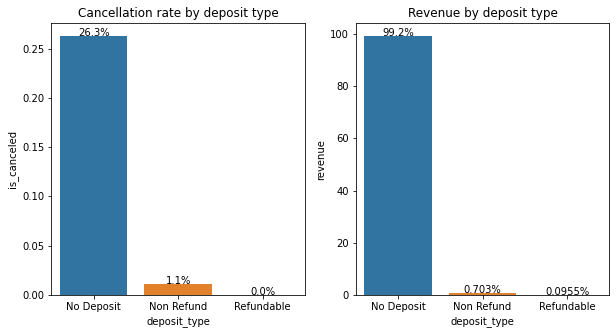

In [70]:
# Creating a new dataframe 'data' with the cancellation rate for each deposit type
data = (df_2.groupby('deposit_type')['is_canceled'].sum()/len(df_2)).reset_index()

# Creating a figure with a size of (10,5)
plt.figure(figsize=(10,5))

# First subplot
plt.subplot(1,2,1)

# Creating a bar plot of the cancellation rate for each deposit type
sns.barplot(x= 'deposit_type',y='is_canceled', data = data)

# Adding the percentage value of cancellation rate on top of each bar
for idx,y in enumerate(data['is_canceled']):
    plt.text(idx,y,'{:.1%}'.format(y), ha ='center')

# Adding title to the subplot
plt.title("Cancellation rate by deposit type")

# Second subplot
plt.subplot(1,2,2)

# Creating a new dataframe 'data' with the revenue for each deposit type as a percentage of total revenue
data = (df_2.groupby('deposit_type')['revenue'].sum()*100/sum(df_2['revenue'])).reset_index()

# Creating a bar plot of the revenue for each deposit type
sns.barplot(x= 'deposit_type',y='revenue', data = data)

# Adding the percentage value of revenue on top of each bar
for idx,y in enumerate(data['revenue']):
    plt.text(idx,y,'{:.3}%'.format(y), ha ='center')

# Adding title to the subplot
plt.title("Revenue by deposit type")


##### 1. Why did you pick the specific chart?

Here bar charts helps us to compare cancelation rate of different segments of customers 

##### 2. What is/are the insight(s) found from the chart?

- Data indicates Most `cancelations` are from customers booking without deposits (`26.3%` of total bookings)
- Most `revenue` (`99.2%` of total revenue) is also from the same segment  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- To reduce the cancelation rates, the management could to encourage customers who are making a deposit by providing additional offers and reduced rates.

#### Chart - 13. Duration  of stay over months and weeks?


<ipython-input-71-c4e6ba1f9c96>:23: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  sns.lineplot(x=data['reservation_status_date'].dt.week,y='Total_stay_duration',data = data);


Total_stay_duration Statistics
count    86326.000000
mean         3.554769
std          2.439017
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: Total_stay_duration, dtype: float64


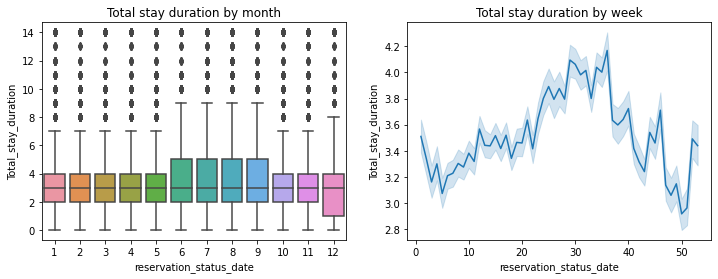

In [71]:
# Creating a figure with a size of (12,4)
plt.figure(figsize=(12,4))

# Creating a new column 'Total_stay_duration' in the dataframe df_2
df_2['Total_stay_duration'] = df_2['stays_in_weekend_nights'] + df_2['stays_in_week_nights']

# Filtering the dataframe to include only rows where the total stay duration is less than 15 days for better visualization
data = df_2[df_2['Total_stay_duration']<15].reset_index(drop = True)

# First subplot
plt.subplot(1,2,1)

# Creating a boxplot of total stay duration by month of reservation status
sns.boxplot(x=data['reservation_status_date'].dt.month,y='Total_stay_duration',data = data);

# Adding title to the subplot
plt.title("Total stay duration by month")

# Second subplot
plt.subplot(1,2,2)

# Creating a lineplot of total stay duration by week of reservation status
sns.lineplot(x=data['reservation_status_date'].dt.week,y='Total_stay_duration',data = data);

# Adding title to the subplot
plt.title("Total stay duration by week")

#Printing the summary statistics of 'Total_stay_duration'
print('Total_stay_duration Statistics')
print(data['Total_stay_duration'].describe())

# Show chart
plt.show()

##### 1. Why did you pick the specific chart?

Here boxplots and lineplots helps us to visualize the distribution of duration data over different months

##### 2. What is/are the insight(s) found from the chart?

- Average stay duration is relatively higher for the months `June` to `September`
- The average stay duration lies between `2.8` and `4.2`
- The average stay duration steadily increases upto approximately `35th week` then sharply decreases 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Some months have relatively higher average stay duration. With these insights the hotel management can better allocate resources to meet the customer needs 

#### Chart - 14. Is there any relationship between Duration of stay vs ADR?

In [72]:
# Removing outlier in adr
df_2 = df_2[df_2['adr']<1000]

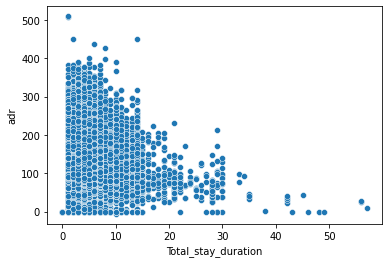

In [73]:
# Chart - 14 visualization code
# Total stay duration vs adr sns.scatterplot
sns.scatterplot(x='Total_stay_duration',y='adr',data = df_2);

##### 1. Why did you pick the specific chart?

- Here, a scatterplot is used to visualize the relationship between two numerical continuous variables (adr and total stay duration) by displaying the dependency of the two variables on each other.

##### 2. What is/are the insight(s) found from the chart?

- From the chart we can observe a `negative correlation` between `ADR` and `stay duarion`

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Since customers staying for shorter periods generate more ADR management can focus attracting more of these customers to increase revenue.

### Multi Variate Visualization

#### Chart - 15 - What is the count of bookings and cancellations for each hotel over the years?

hotel             City Hotel       Resort Hotel      
is_canceled                0     1            0     1
arrival_date_year                                    
2015                    5128  1321         5381  1123
2016                   18969  7786        11968  3400
2017                   13280  6838         8225  3271

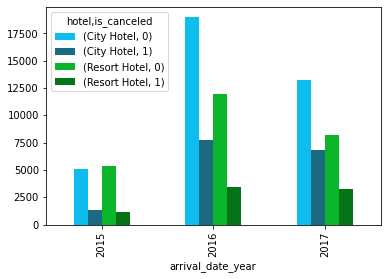

In [82]:
# Chart - 15 visualization code
# create pivot table with year as index and hotel and is_canceled as columns, counting the number of rows
pivot_1 = pd.pivot_table(df_2, index=['arrival_date_year'], columns=['hotel','is_canceled'], aggfunc='size')

# plot the pivot table using bar chart and set color codes for the bars
pivot_1.plot(kind ='bar',color=['#0ebded','#1c6a80','#0bb52a','#077319'])
pivot_1

##### 1. Why did you pick the specific chart?

- We can observe the trend in number of bookings and cancellations effectively using stacked bar charts

##### 2. What is/are the insight(s) found from the chart?


- There seems to be an overall increase in the number of bookings in the year 2016 followed by a decrease in 2017.
- The number of cancellations also seems to follow the same pattern. 
- The data suggests that City Hotel is more popular among customers but also has a higher cancellation rate

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


- The data suggests that Resort Hotel is less popular than City Hotel.If the hotel is not able to attract more customers and increase its popularity, it may struggle to grow occupancy and revenue. 

#### Chart - 16 - Correlation Heatmap

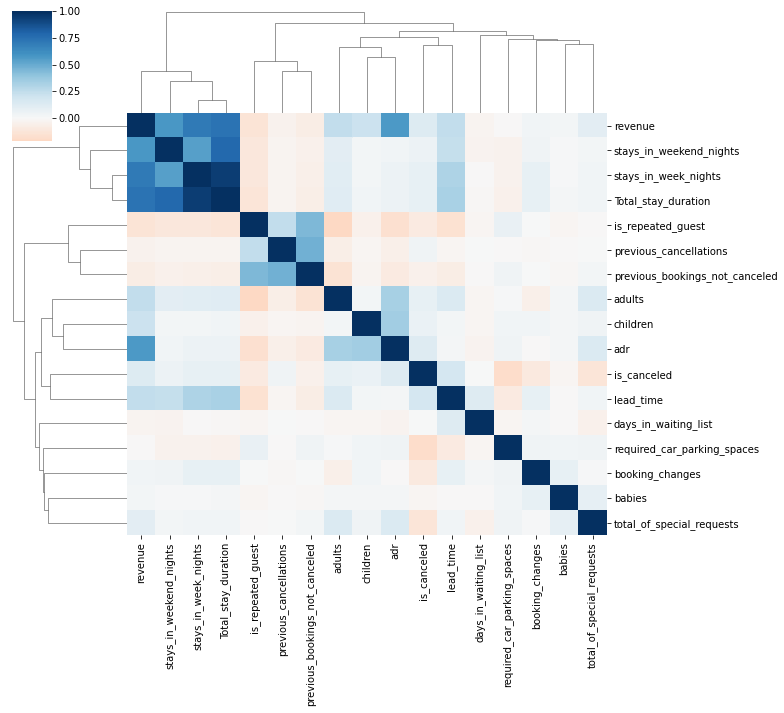

In [83]:
# Correlation Heatmap visualization code
# Droping number of day, month, year as their numerical correlation does not add value to our analysis
df_3 = df_2.drop(['arrival_date_day_of_month', 'arrival_date_year',
                  'arrival_date_month', 'arrival_date_week_number'], axis=1)

# ploting cluster map using sns.clstermap()
sns.clustermap(df_3.corr(),cmap='RdBu',center=0,figsize=(11, 10))

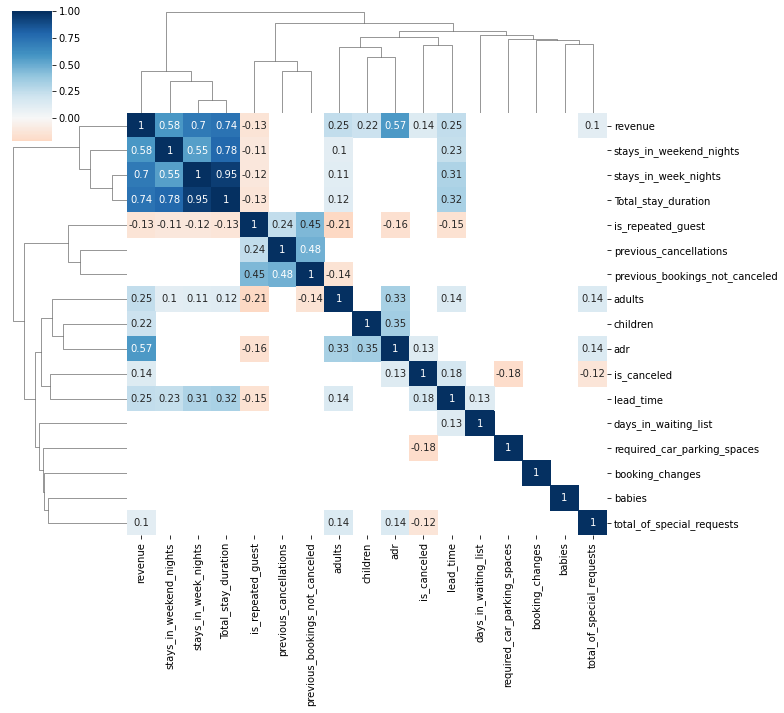

In [76]:
#sorted correlation chart of numerical values

mask = (df_3.corr() < 0.1)&(df_3.corr() > -0.1)
sns.clustermap(df_3.corr(),cmap='RdBu',center=0,figsize=(11, 10),annot=True,mask=mask)
plt.show()

##### 1. Why did you pick the specific chart?

- A correlation heatmap helps us to visualize the correlations between multiple variables

##### 2. What is/are the insight(s) found from the chart?

- `adr` seems to be positively correlated with children,adults,total_of_special_requests,is_cancelled
- `lead_time` seems to be positively correlated with stays_in_weeknd_nights,stays_in_week_nights 
- `is_repeated_guest` seems to be negatively correlated with adr, is_cancelled,lead_time
-is cancelled seems to be positively correlated with lead_time and adr also negatively correlaed with total_of_special_requests
Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
- The Booking patterns consistently peak in July and August, increase staffing and inventory during these months to accommodate the increased demand.
- Optimize pricing and availability of room types based on customer preferences. Since room type A is the most preferred, ensure that it is available during peak booking months and adjust pricing accordingly
- Increase customer satisfaction by improving the online booking process and customer support.
- Since breakfast in bed is the most popular meal,consider offering it more often or as a package deal to increase revenue and customer satisfaction.
- negative correlation between ADR and stay duration suggests that customers staying for shorter periods generate more ADR. This information can inform the company to focus on attracting more of these customers to increase revenue.
- The information on the average stay duration being relatively higher for the months June to September can help the hotel management to better allocate resources to meet customer needs during these periods.
- To reduce the cancellation rates, the management could encourage customers who are making a deposit by providing additional offers and reduced rates.
- The hotel should direct its marketing efforts 
towards online mediums to capture more bookings


# **Conclusion**

In summary, the hotel booking data can be used to gain insights into booking patterns and customer behavior, which can inform strategies for increasing occupancy, revenue, and customer satisfaction.

The hotel should focus on increasing staffing and inventory during peak booking 
months, improve pricing strategy, improve customer support, offer popular amenities 
and services as add-ones during booking, build relationships with online travel agents, 
encourage deposits during booking also direct marketing towards online and social 
media.

 By implementing these strategies, the hotel management will be able to achieve their business objectives.

# **Scope**

Further analysis needs to be carried out to improve customer satisfaction by incorporating customer feedback in the dataset\
With the available data a machine learning model can be created to predict room cancellations or booking trends 

### References
1. [Almabetter - Full Stack Data Science](https://grow.almabetter.com/data-science/learn/full-stack-data-science)
2. [Codebasics - Pandas Tutorial (Data Analysis In Python) ](https://youtu.be/CmorAWRsCAw)
3. [Udacity - Intro to Data Analysis](https://www.udacity.com/course/intro-to-data-analysis--ud170)
